In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('./housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.isna().sum()

CRIM        0
 ZN         0
 INDUS      0
 CHAS       0
 NOX        0
 RM         0
 AGE        0
 DIS        0
 RAD        0
 TAX        0
 PTRATIO    0
 B          0
 LSTAT      0
MEDV        0
dtype: int64

In [4]:
df.columns = df.columns.str.replace(" ", "")

<Axes: xlabel='MEDV'>

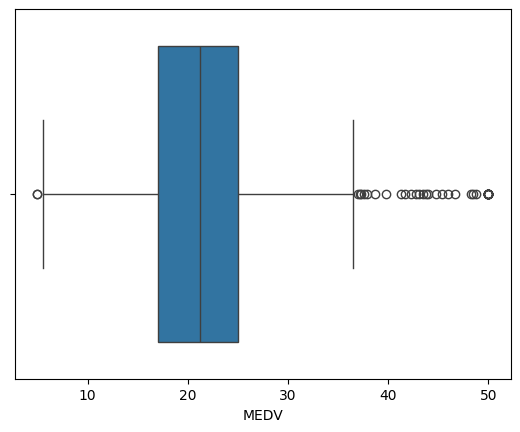

In [5]:
sns.boxplot(x=df['MEDV'])

In [6]:
# There are multiple methods for outlier treatment. We will use the easiest and quickest option

upper_limit = df['MEDV'].quantile(0.95)
lower_limit = df['MEDV'].quantile(0.05)

print(f'upper_limit: {upper_limit}, lower_limit: {lower_limit}')

upper_limit: 43.4, lower_limit: 10.2


In [7]:
mask = (df['MEDV'] < upper_limit) & (df['MEDV'] > lower_limit)

df = df[mask]

In [8]:
df['MEDV'].describe()

count    453.000000
mean      21.909934
std        6.516440
min       10.400000
25%       17.600000
50%       21.200000
75%       24.600000
max       43.100000
Name: MEDV, dtype: float64

In [9]:
# statsmodel OLS (ordinary least squares) - least square model
X = df.drop(columns='MEDV')
y = df['MEDV']

In [10]:
X_constant = sm.add_constant(X)

OLS_model = sm.OLS(y, X_constant).fit()

In [11]:
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     93.72
Date:                Thu, 18 Jan 2024   Prob (F-statistic):          1.21e-117
Time:                        19:13:12   Log-Likelihood:                -1190.4
No. Observations:                 453   AIC:                             2409.
Df Residuals:                     439   BIC:                             2467.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.7369      3.835      8.535      0.000      25.199      40.275
CRIM          -0.1108      0.032     -3.468      0.001      -0.174      -0.048
ZN             0.0359      0.011      3.385      0.001       0.015       0.057
INDUS         -0.0461      0.046     -1.009      0.314      -0.136       0.044
CHAS           0.4062      0.685      0.593      0.553      -0.940       1.752
NOX          -11.6633      2.818     -4.139      0.000     -17.201      -6.126
RM             3.1756      0.352      9.029      0.000       2.484       3.867
AGE           -0.0234      0.010     -2.347      0.019      -0.043      -0.004
DIS           -1.1106      0.148     -7.488      0.000      -1.402      -0.819
RAD            0.2459      0.052      4.763      0.000       0.144       0.347
TAX           -0.0122      0.003     -4.249      0.000      -0.018      -0.007
PTRATIO       -0.7419      0.097     -7.682      0.000      -0.932      -0.552
B              0.0070      0.002      3.152      0.002       0.003       0.011
LSTAT         -0.3330      0.042     -7.951      0.000      -0.415      -0.251
==============================================================================
Omnibus:                       82.409   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.209
Skew:                           0.993   Prob(JB):                     1.33e-36
Kurtosis:                       5.192   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Important metrics in the OLS Evaluation:

**R-Squared**
- The proportion of the variance in the dependent variable explained by the independent variables. How well do the independent variables together explain MEDV variance?
- The range is 0 to 1. Higher values means a better fit
- The goal is to get a number that is higher than 0.7 (goodness-to-fit)

**coef**
- Measures the direction and magnitude of change between dependent and independent variables
- Strength of the relationship
- Unitless change in one variable to another
- For example: for NOX column, one-unit increase causes -11.53 for MEDV
- Tradeoff of coeffients:
  - Similar coefficients can add noise

### Multicollinearity Evaluation

#### Perason Correlation

To get good numbers of coefficients, we need to evaluate multicollinearity

<Axes: >

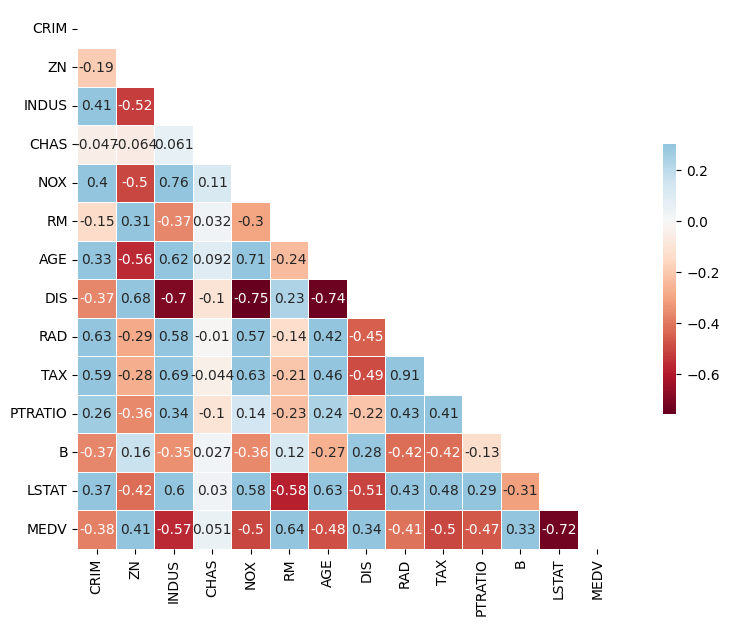

In [19]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 7))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap="RdBu",
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True,
)

- Pearson Correlation ranged between -1 and 1
- Closer to -1 means a negative relationship (e.g. if `a` goes up, `b` goes down)
- Closer to 1 means a positive relationship (e.g. if `a` goes up, `b` goes up)

- We can see that `DIS` and `INDUS` have high correlation (above 0.6)
- One of these columns can stay to avoid multicollinearity

#### VIF Evaluation

*Variance Inflation Factor*

- Measures the multicollinearity among features within a model
- VIF around 1: there's NO multicollinearity
- VIF higher than 1: there IS multicollinearity

In [24]:
vif_data = pd.DataFrame(X.columns, columns=['Column_Name'])
vif_data['VIF_Value'] = [variance_inflation_factor(X.values, i) for i in range(len(vif_data))]

In [26]:
vif_data

,Column_Name,VIF_Value
0,CRIM,2.040553
1,ZN,2.882467
2,INDUS,13.154087
3,CHAS,1.133794
4,NOX,69.915592
5,RM,95.677151
6,AGE,20.382354
7,DIS,15.444203
8,RAD,14.128851
9,TAX,57.972566


- We observe high MC among the columns (features)
- We can get rid of the features with the highest VIF scores: `RM`, `NOX`, `PTRATIO`

In [27]:
X_keep = X.drop(columns=['RM', 'NOX', 'PTRATIO'], axis=1)
X_keep.head()

,CRIM,ZN,INDUS,CHAS,AGE,DIS,RAD,TAX,B,LSTAT
0,0.00632,18.0,2.31,0,65.2,4.0900,1,296.0,396.90,4.98
1,0.02731,0.0,7.07,0,78.9,4.9671,2,242.0,396.90,9.14
2,0.02729,0.0,7.07,0,61.1,4.9671,2,242.0,392.83,4.03
3,0.03237,0.0,2.18,0,45.8,6.0622,3,222.0,394.63,2.94
4,0.06905,0.0,2.18,0,54.2,6.0622,3,222.0,396.90,5.33


Now let's rerun our OLS model to see if there's a difference in coefficients

In [28]:
X_constant = sm.add_constant(X_keep)
OLS_model = sm.OLS(y, X_constant).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     78.08
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           3.75e-91
Time:                        20:10:32   Log-Likelihood:                -1260.9
No. Observations:                 453   AIC:                             2544.
Df Residuals:                     442   BIC:                             2589.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.9684      1.740     21.827      0.000      34.550      41.387
CRIM          -0.1078      0.037     -2.905      0.004      -0.181      -0.035
ZN             0.0760      0.012      6.563      0.000       0.053       0.099
INDUS         -0.1671      0.050     -3.310      0.001      -0.266      -0.068
CHAS           1.0362      0.789      1.313      0.190      -0.515       2.588
AGE           -0.0148      0.011     -1.354      0.176      -0.036       0.007
DIS           -1.2225      0.163     -7.516      0.000      -1.542      -0.903
RAD            0.2394      0.059      4.083      0.000       0.124       0.355
TAX           -0.0159      0.003     -4.798      0.000      -0.022      -0.009
B              0.0058      0.003      2.233      0.026       0.001       0.011
LSTAT         -0.5652      0.041    -13.739      0.000      -0.646      -0.484
==============================================================================
Omnibus:                       83.530   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.518
Skew:                           1.006   Prob(JB):                     4.21e-37
Kurtosis:                       5.197   Cond. No.                     5.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""